# Importing the needed libraries for the project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

This dataset is used to recommend the most suitable crop for a given type of soil. It plays a vital role in improving agricultural productivity by minimizing losses, using factors such as soil pH, rainfall, humidity, and the presence of various chemical components.

In [3]:
df = pd.read_csv("Crop_recommendation.csv")

In [13]:
df

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.rename(columns = {"N":"nitrogen","P":"phosphorus","K":"potassium","ph":"PH"}, inplace = True)

In [7]:
# Checking on the dataframes shape
df.shape

(2200, 8)

In [8]:
# Checking for null values
df.isnull().sum()

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
PH             0
rainfall       0
label          0
dtype: int64

In [9]:
# Checking for the data types
df.dtypes

nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
PH             float64
rainfall       float64
label           object
dtype: object

In [10]:
#  Checking on the statistical summary
df.describe()

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# EDA Analysis
- Data distribution

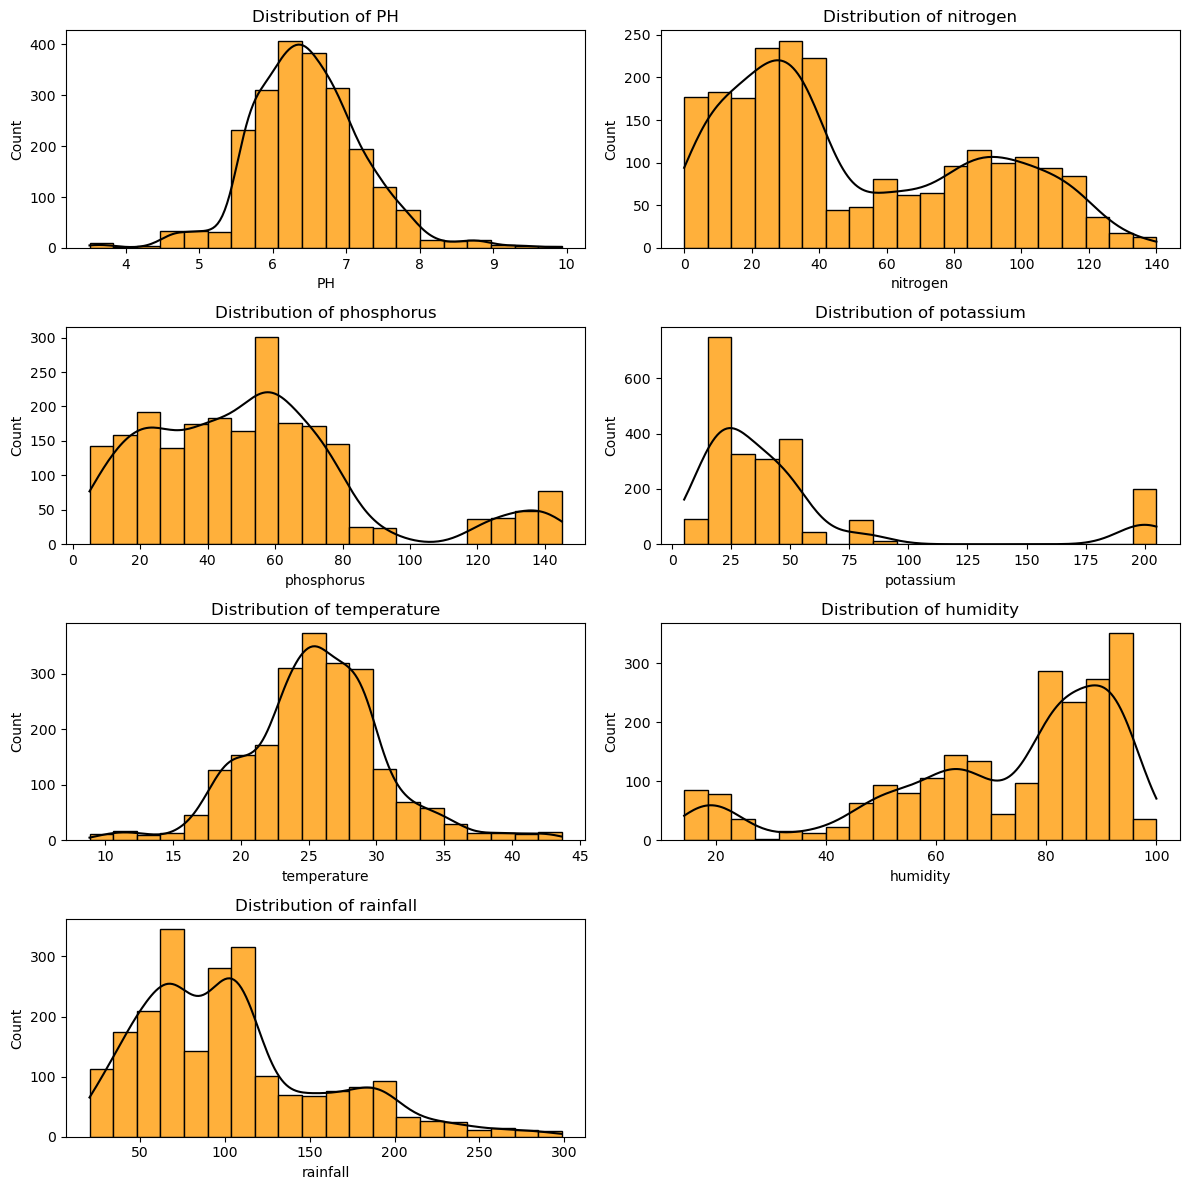

In [11]:
columns_to_plot = ["PH", "nitrogen", "phosphorus", "potassium", "temperature", "humidity", "rainfall"]

n_cols = 2
n_rows = (len(columns_to_plot) + 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], bins=20, kde=True, edgecolor="black", color="black", ax=axs[i], facecolor="#ffb03b")
    axs[i].set_title(f"Distribution of {col}", fontsize=12)
    axs[i].set_xlabel(col, fontsize=10)
    axs[i].grid(False)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [12]:
# Viewing the relationship between rainfall and temperatures in regards to the crop that fluorishes in the set conditons
sns.relplot(data=df,x="rainfall",y="temperature",kind="scatter",hue="label",height=5)
plt.show()

KeyboardInterrupt: 

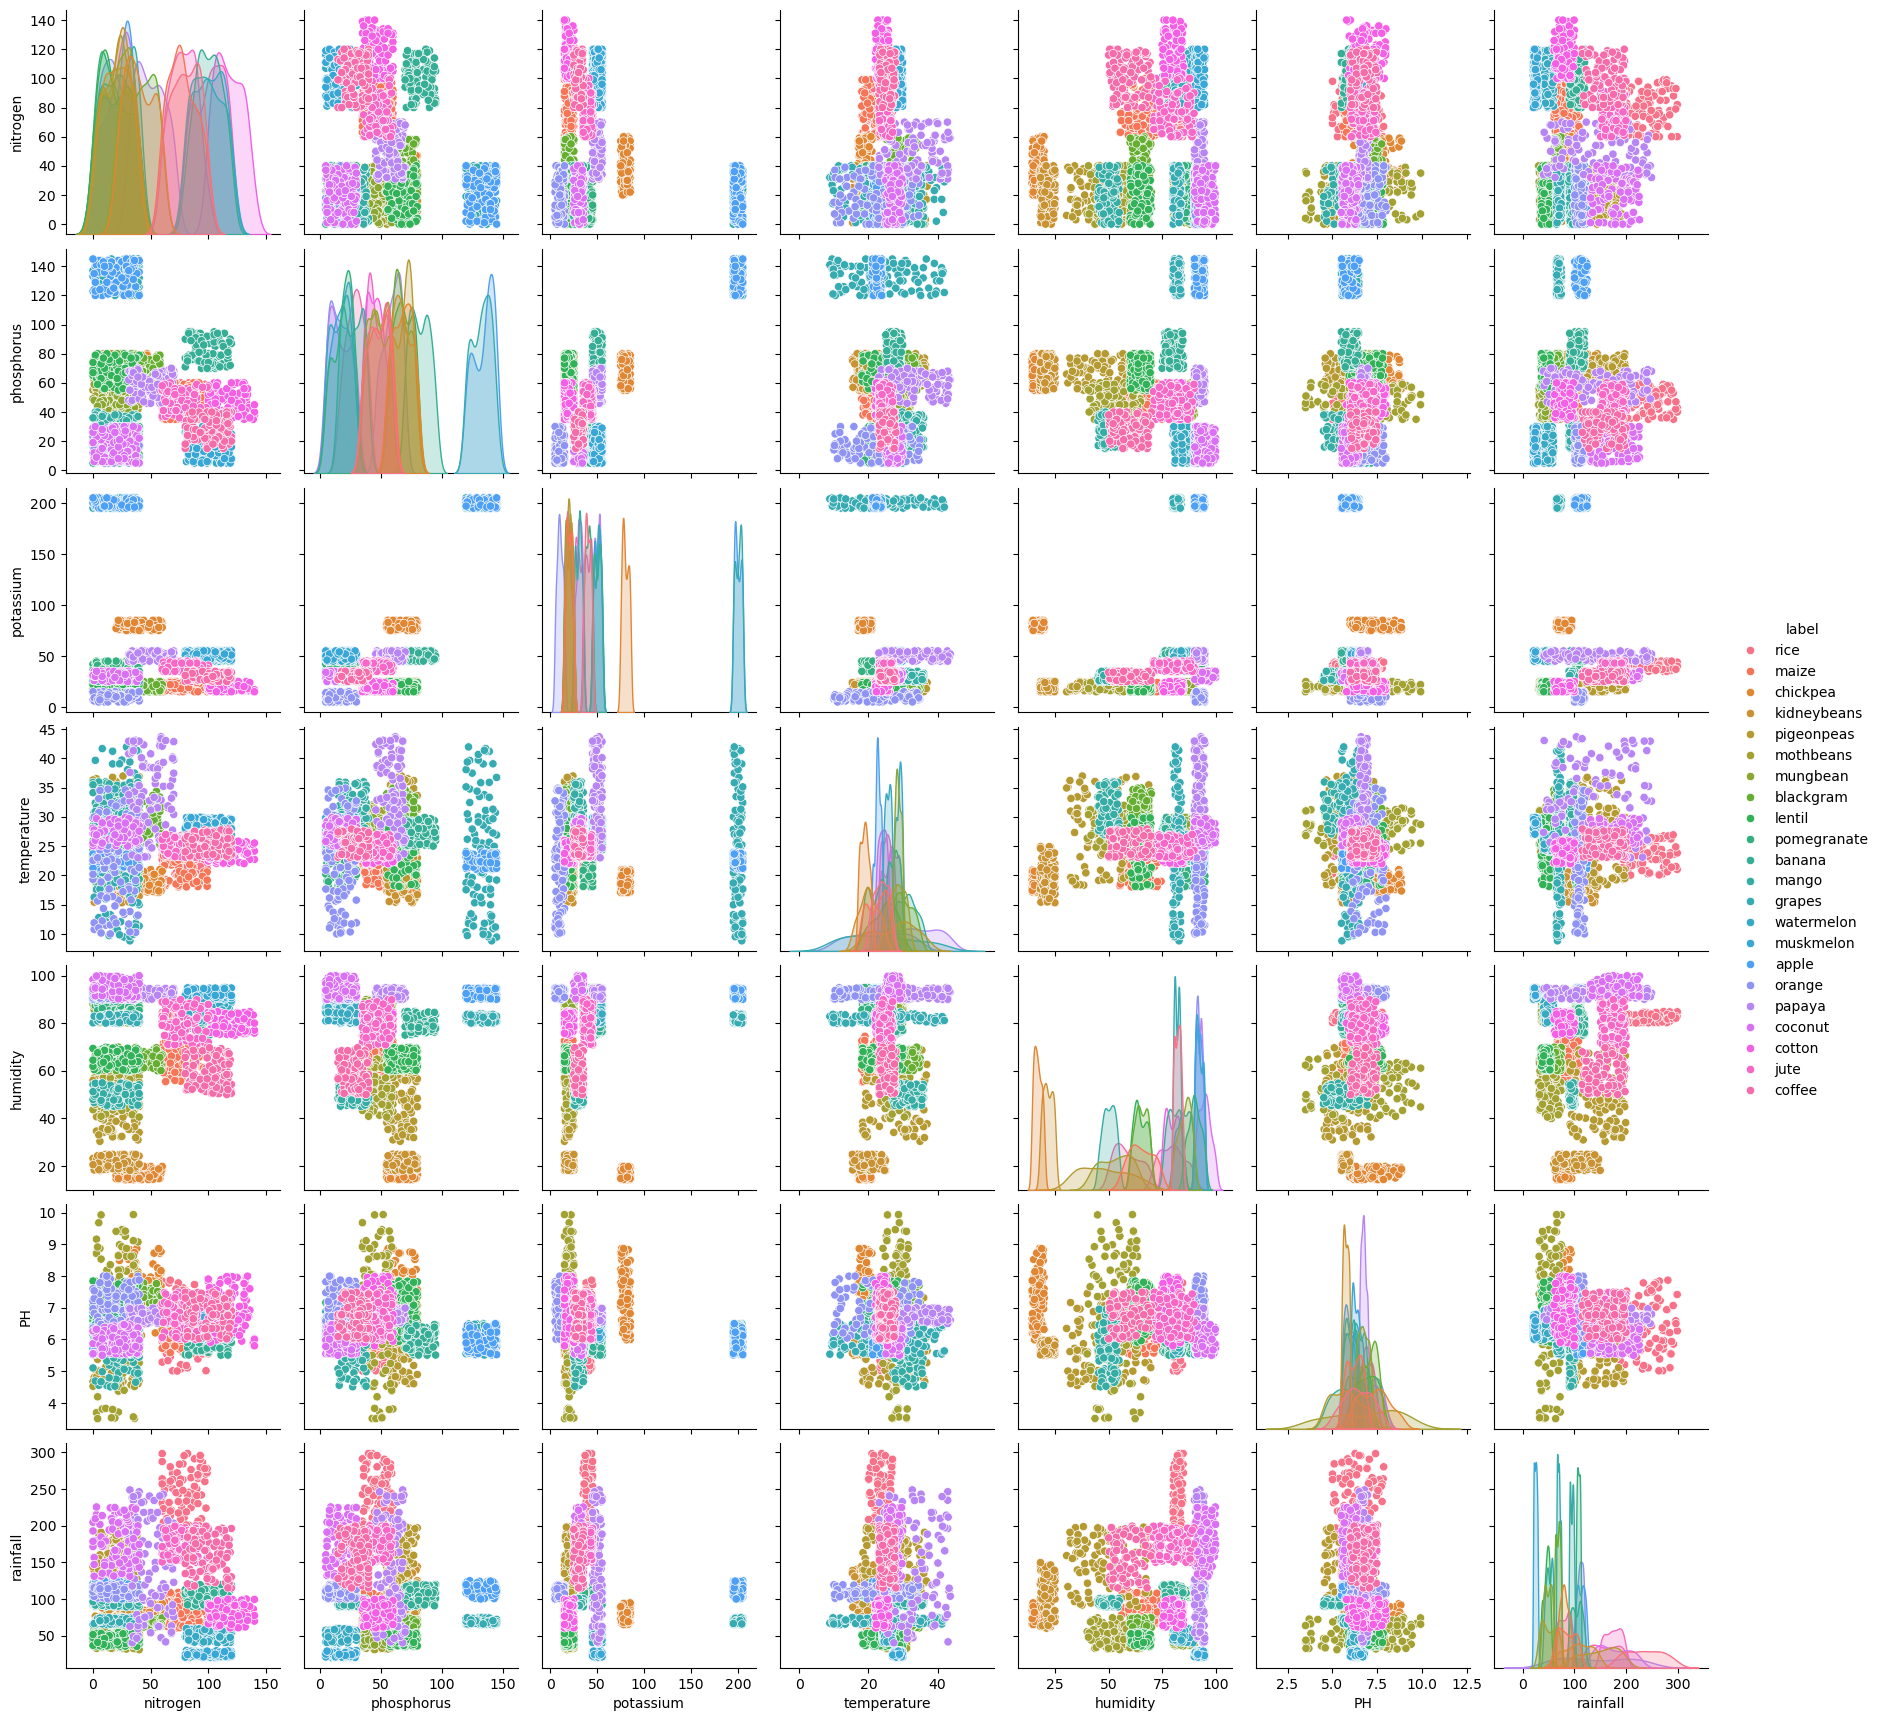

In [ ]:
sns.pairplot(data=df,hue="label")
plt.show()

In [ ]:
# Identifying the unique crops and their counts
# The unique crops in the dataset
crops = df["label"].unique()
print(len(crops))
print(crops)
print(df["label"].value_counts())

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [ ]:
# Filtering each unique label and storing it in a new list (df2) to plot boxplots
df2 = []   
for i in crops:
    df2.append(df[df["label"] == i])
df2[0].head()   

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df2[1].head()

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


In [ ]:
df2[2].head()

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall,label
200,40,72,77,17.024985,16.988612,7.485996,88.551231,chickpea
201,23,72,84,19.020613,17.131591,6.920251,79.926981,chickpea
202,39,58,85,17.887765,15.405897,5.996932,68.549329,chickpea
203,22,72,85,18.868056,15.658092,6.391174,88.510490,chickpea
204,36,67,77,18.369526,19.563810,7.152811,79.263577,chickpea


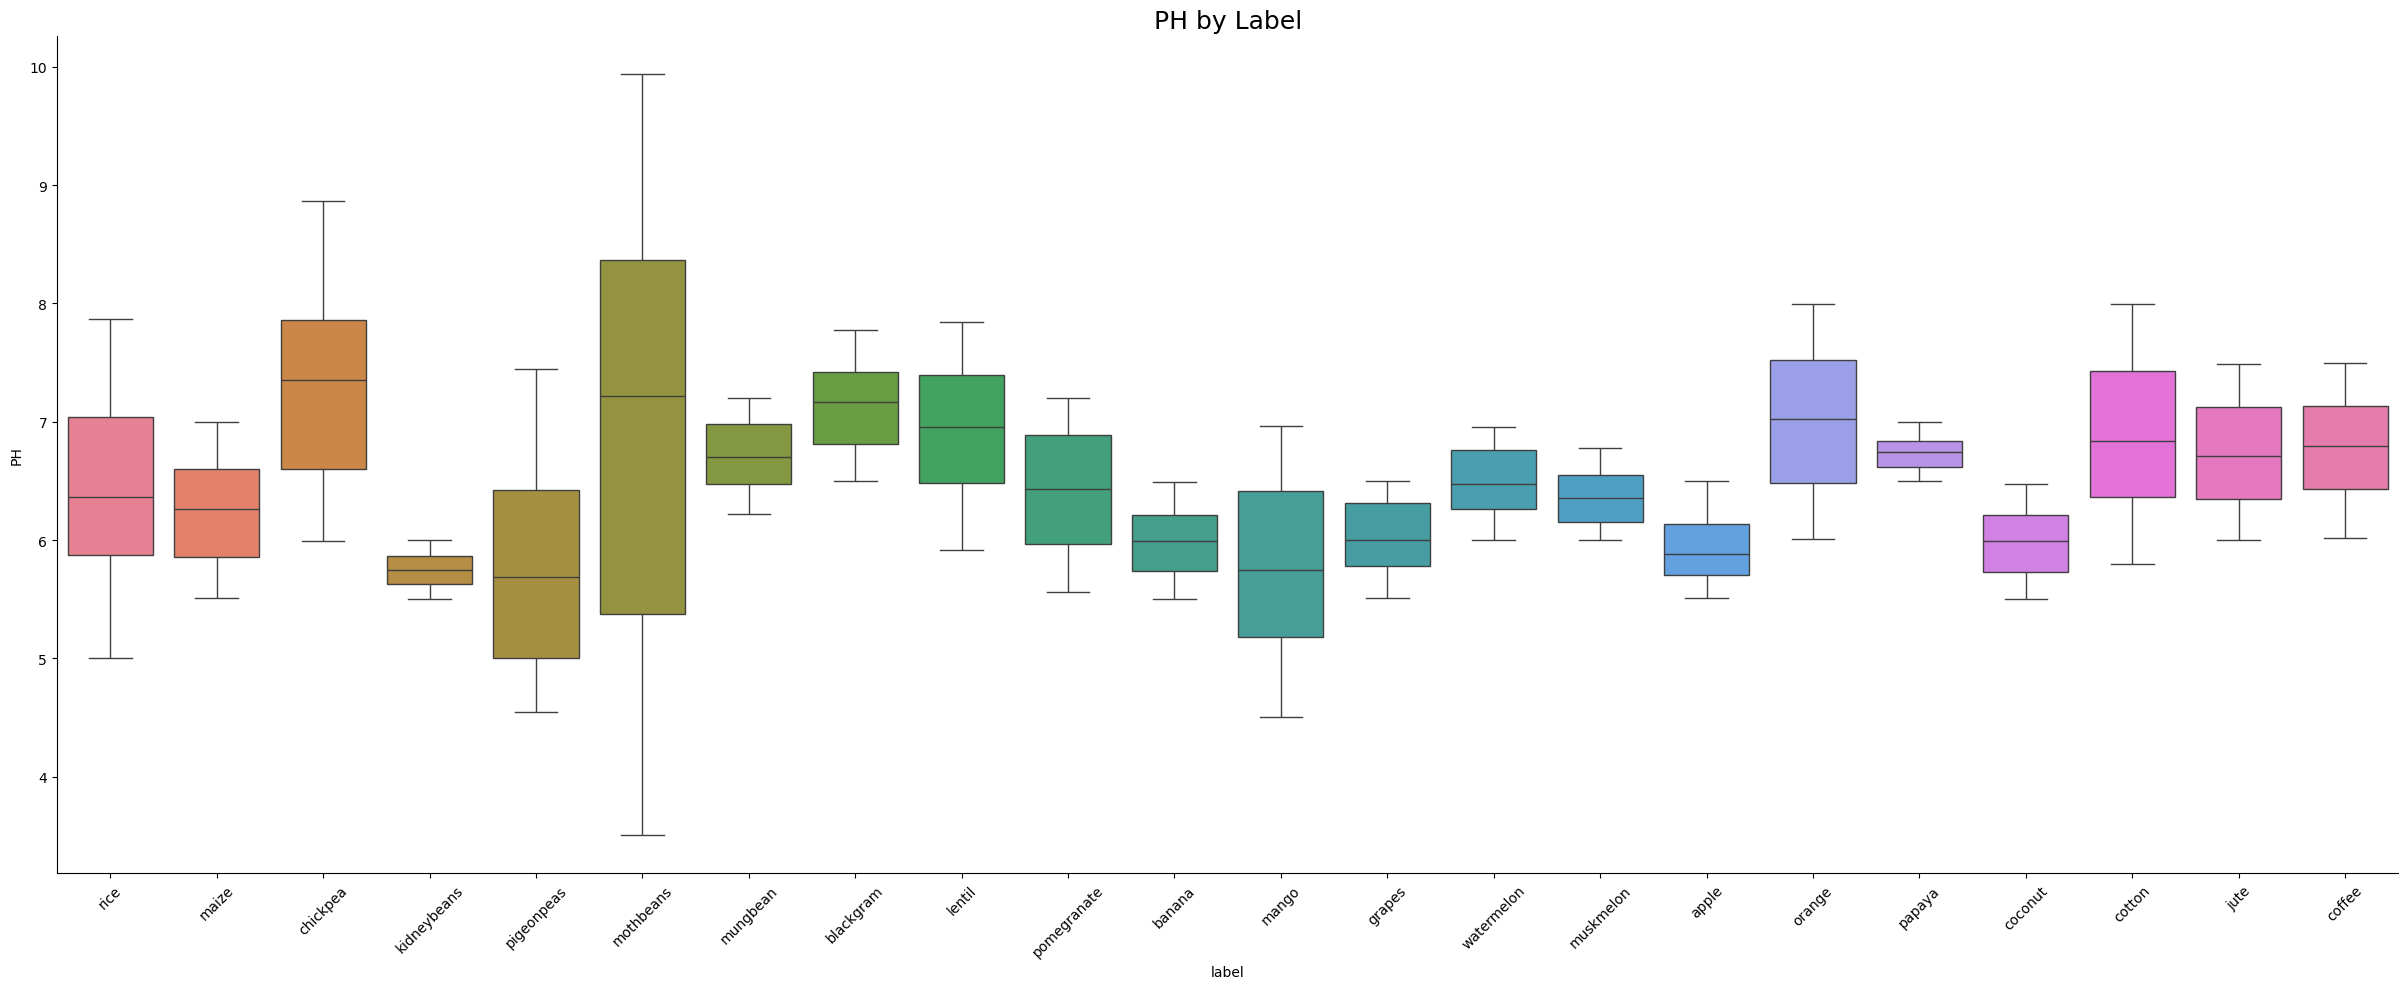

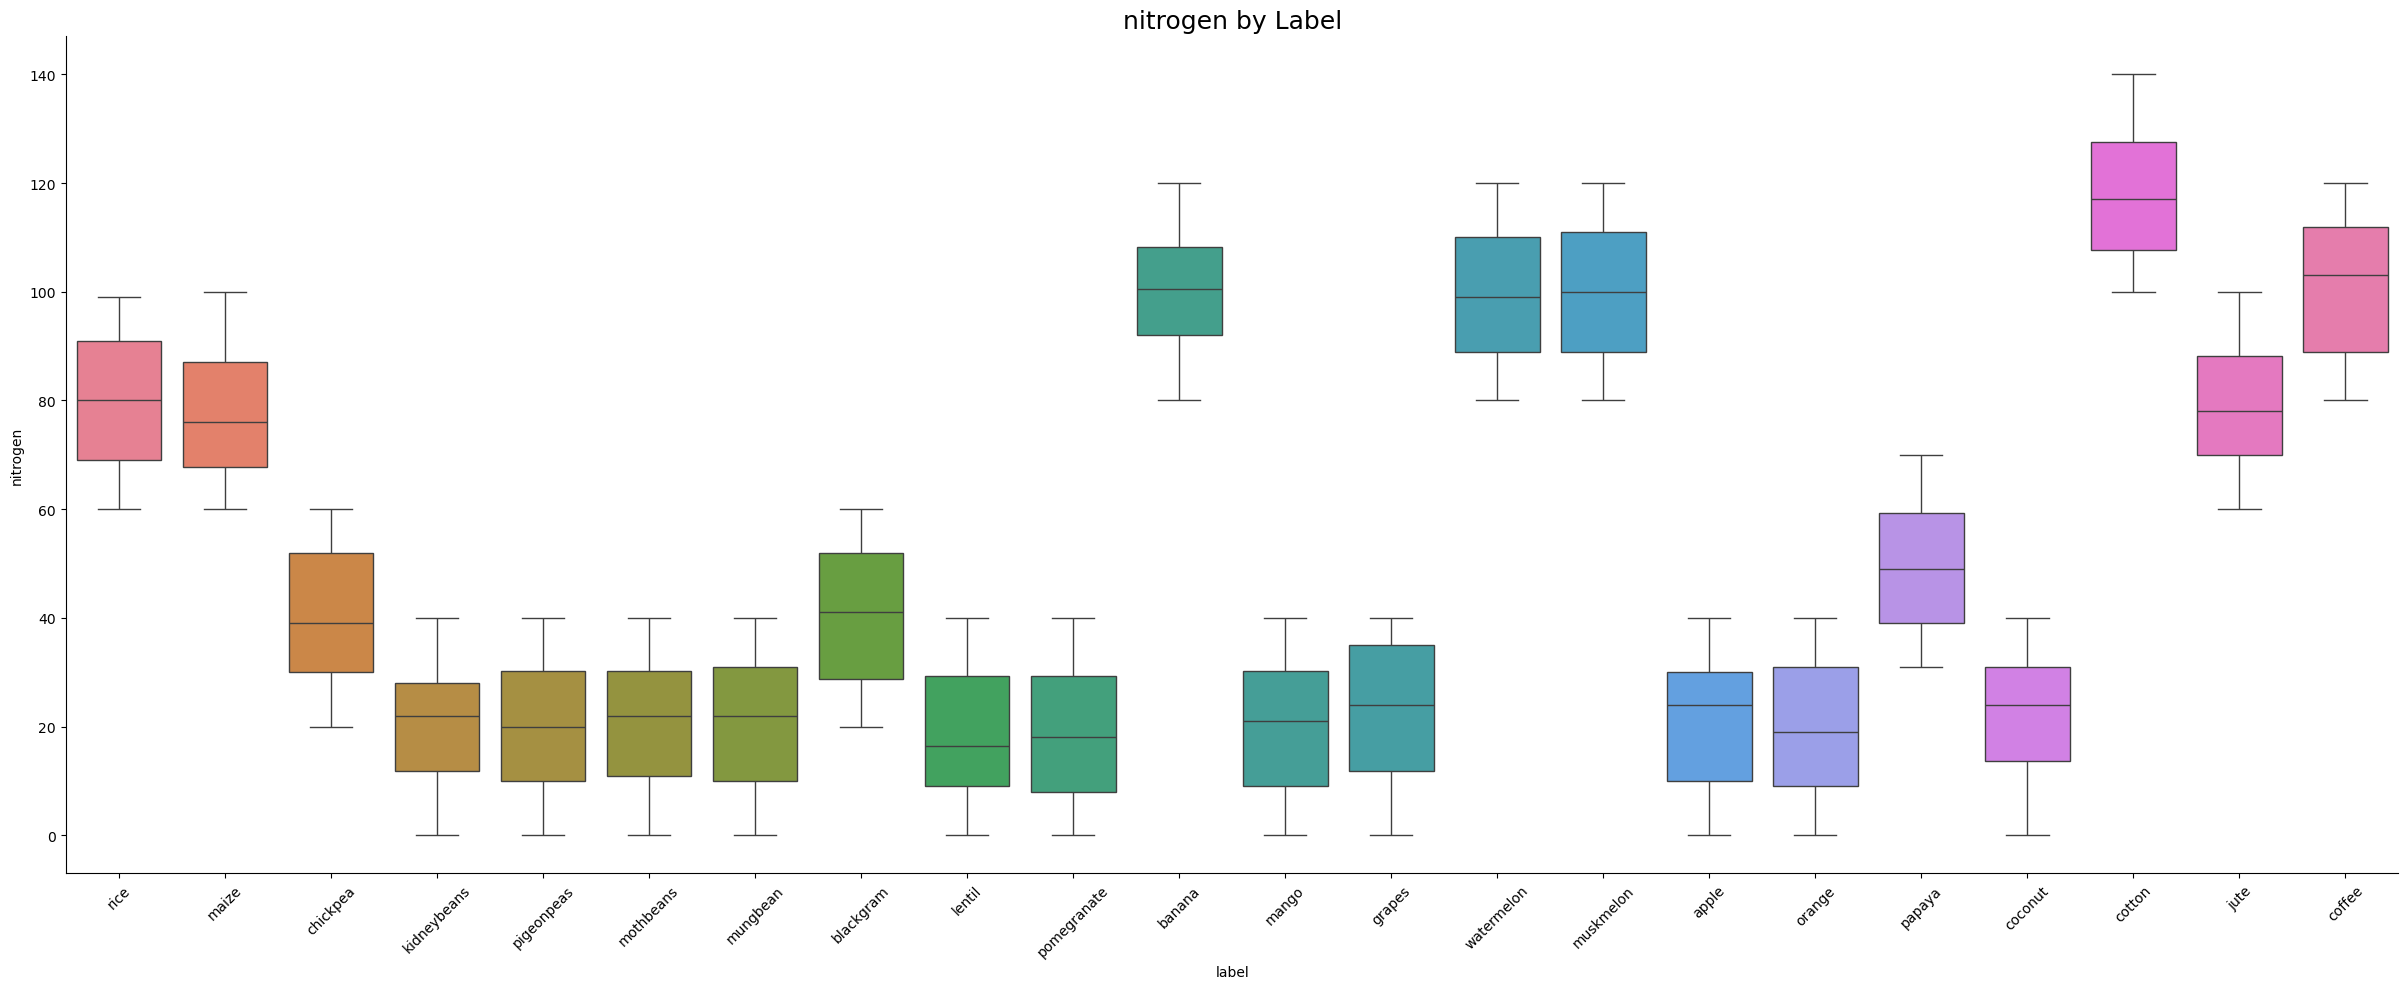

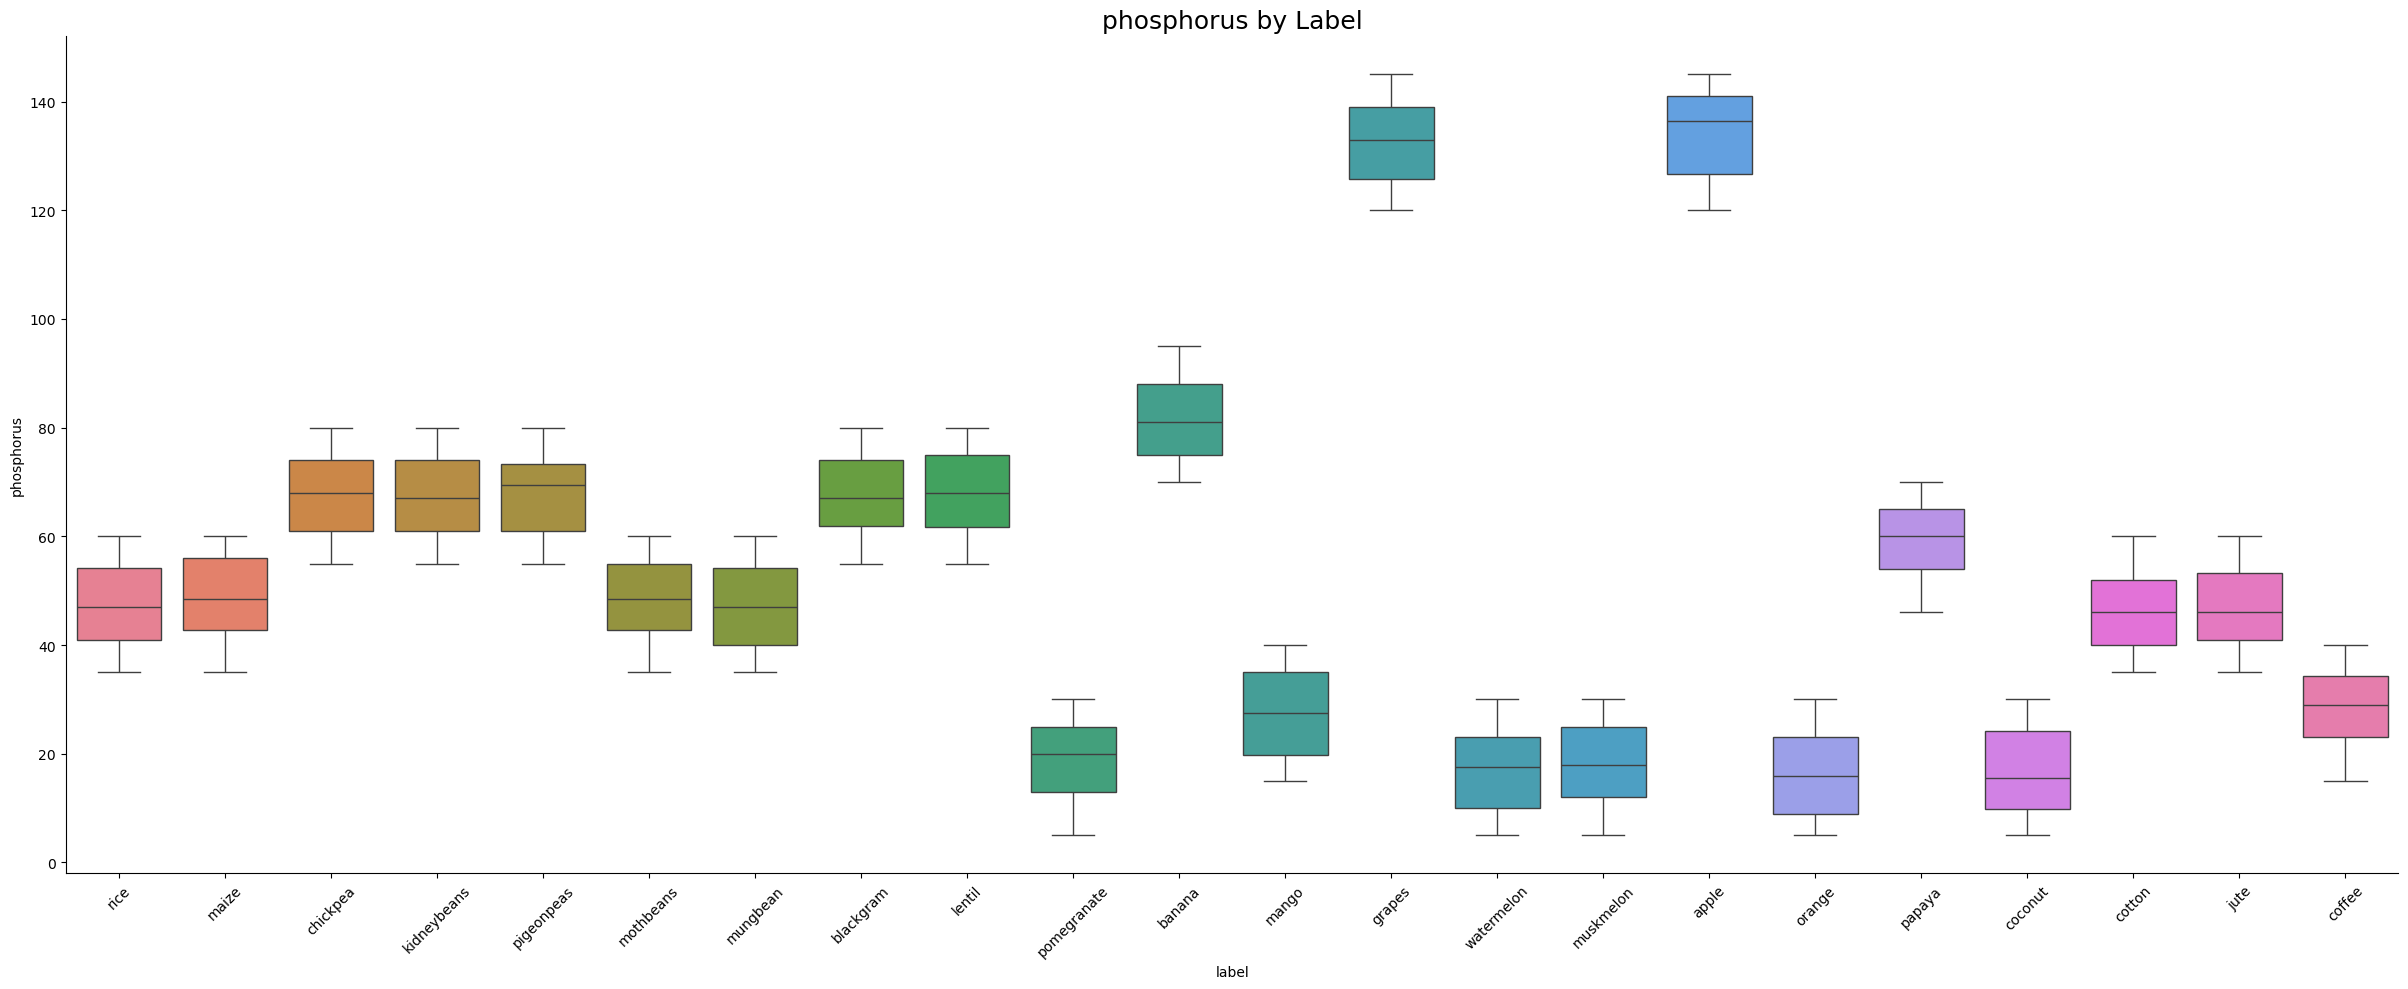

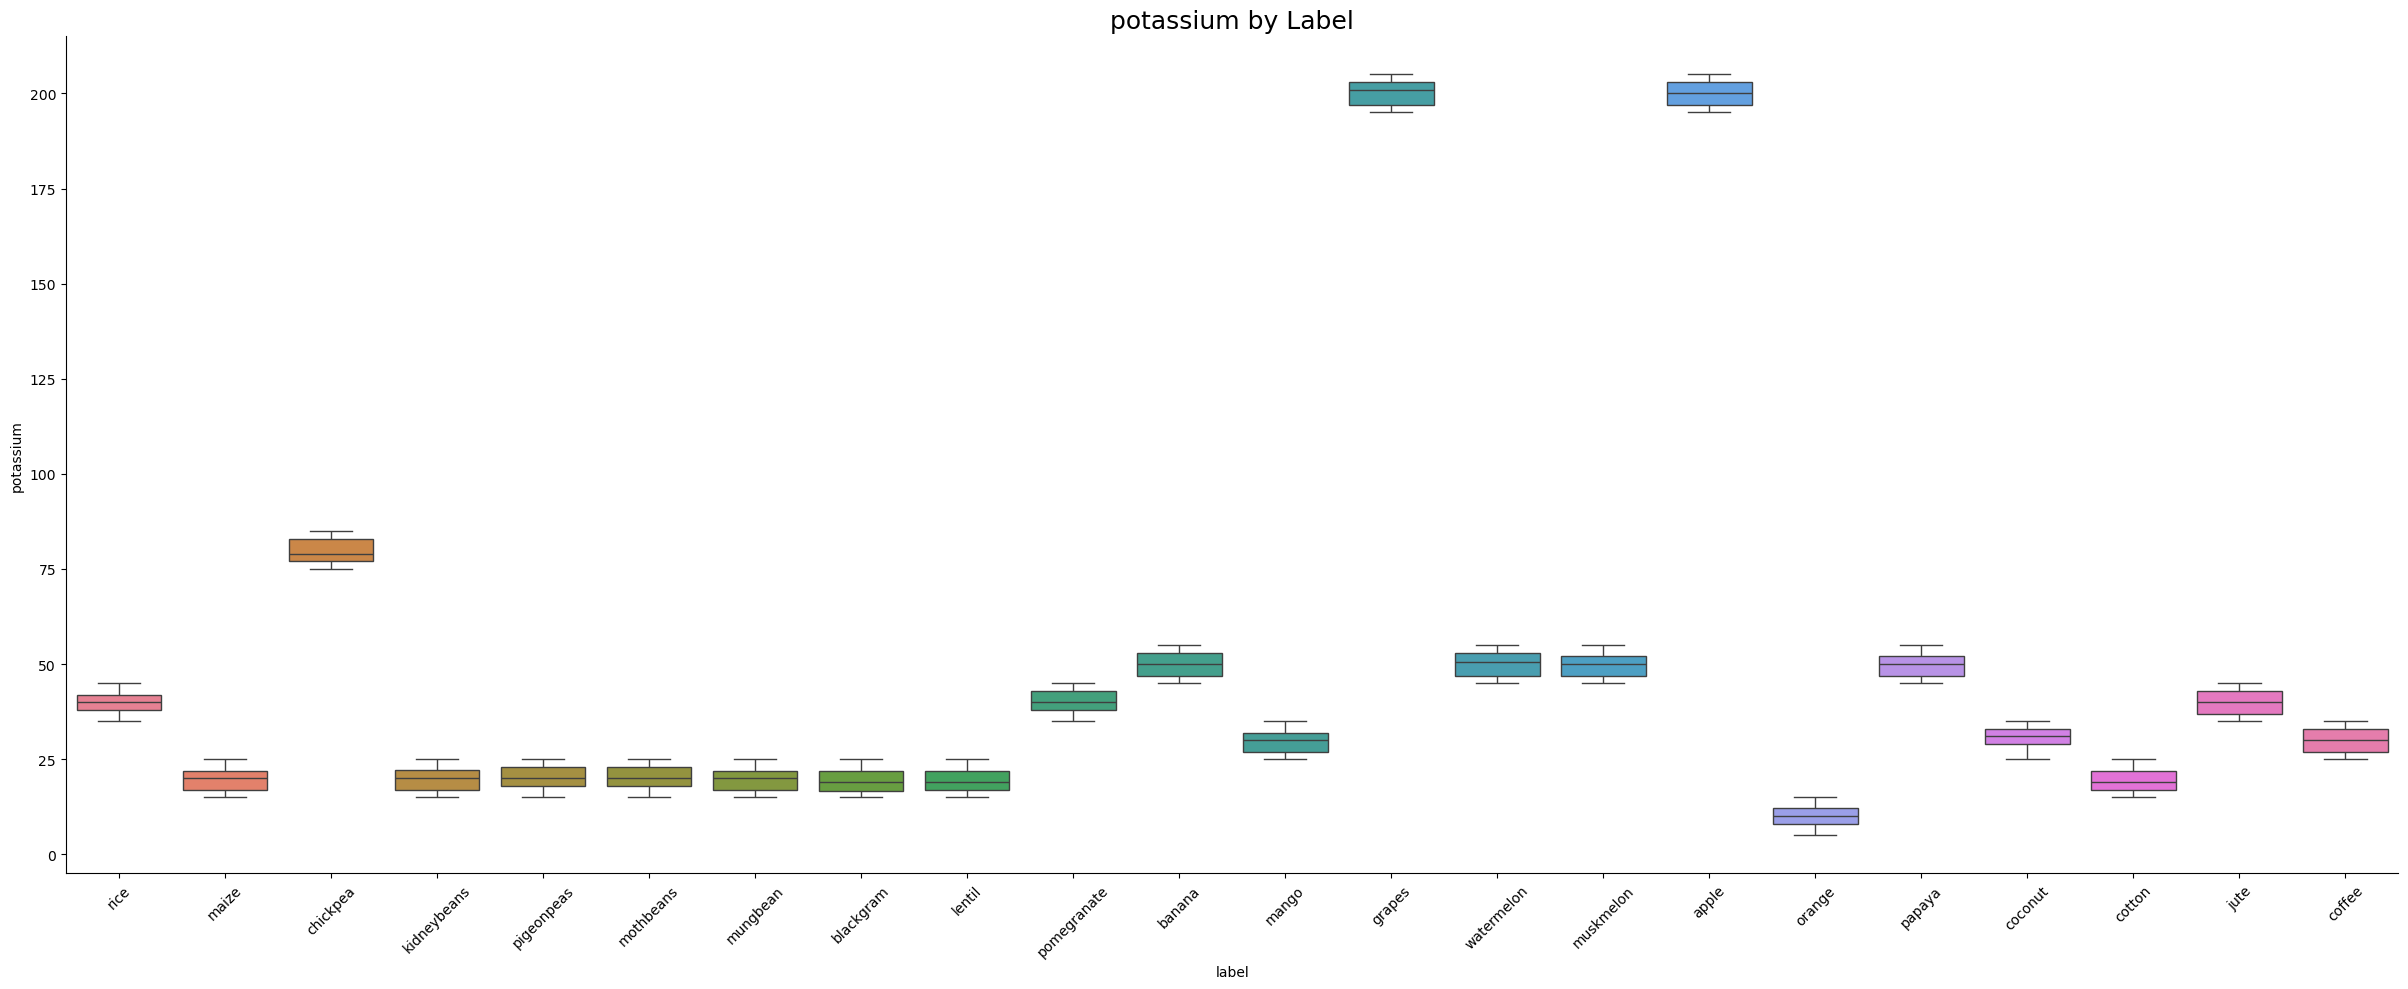

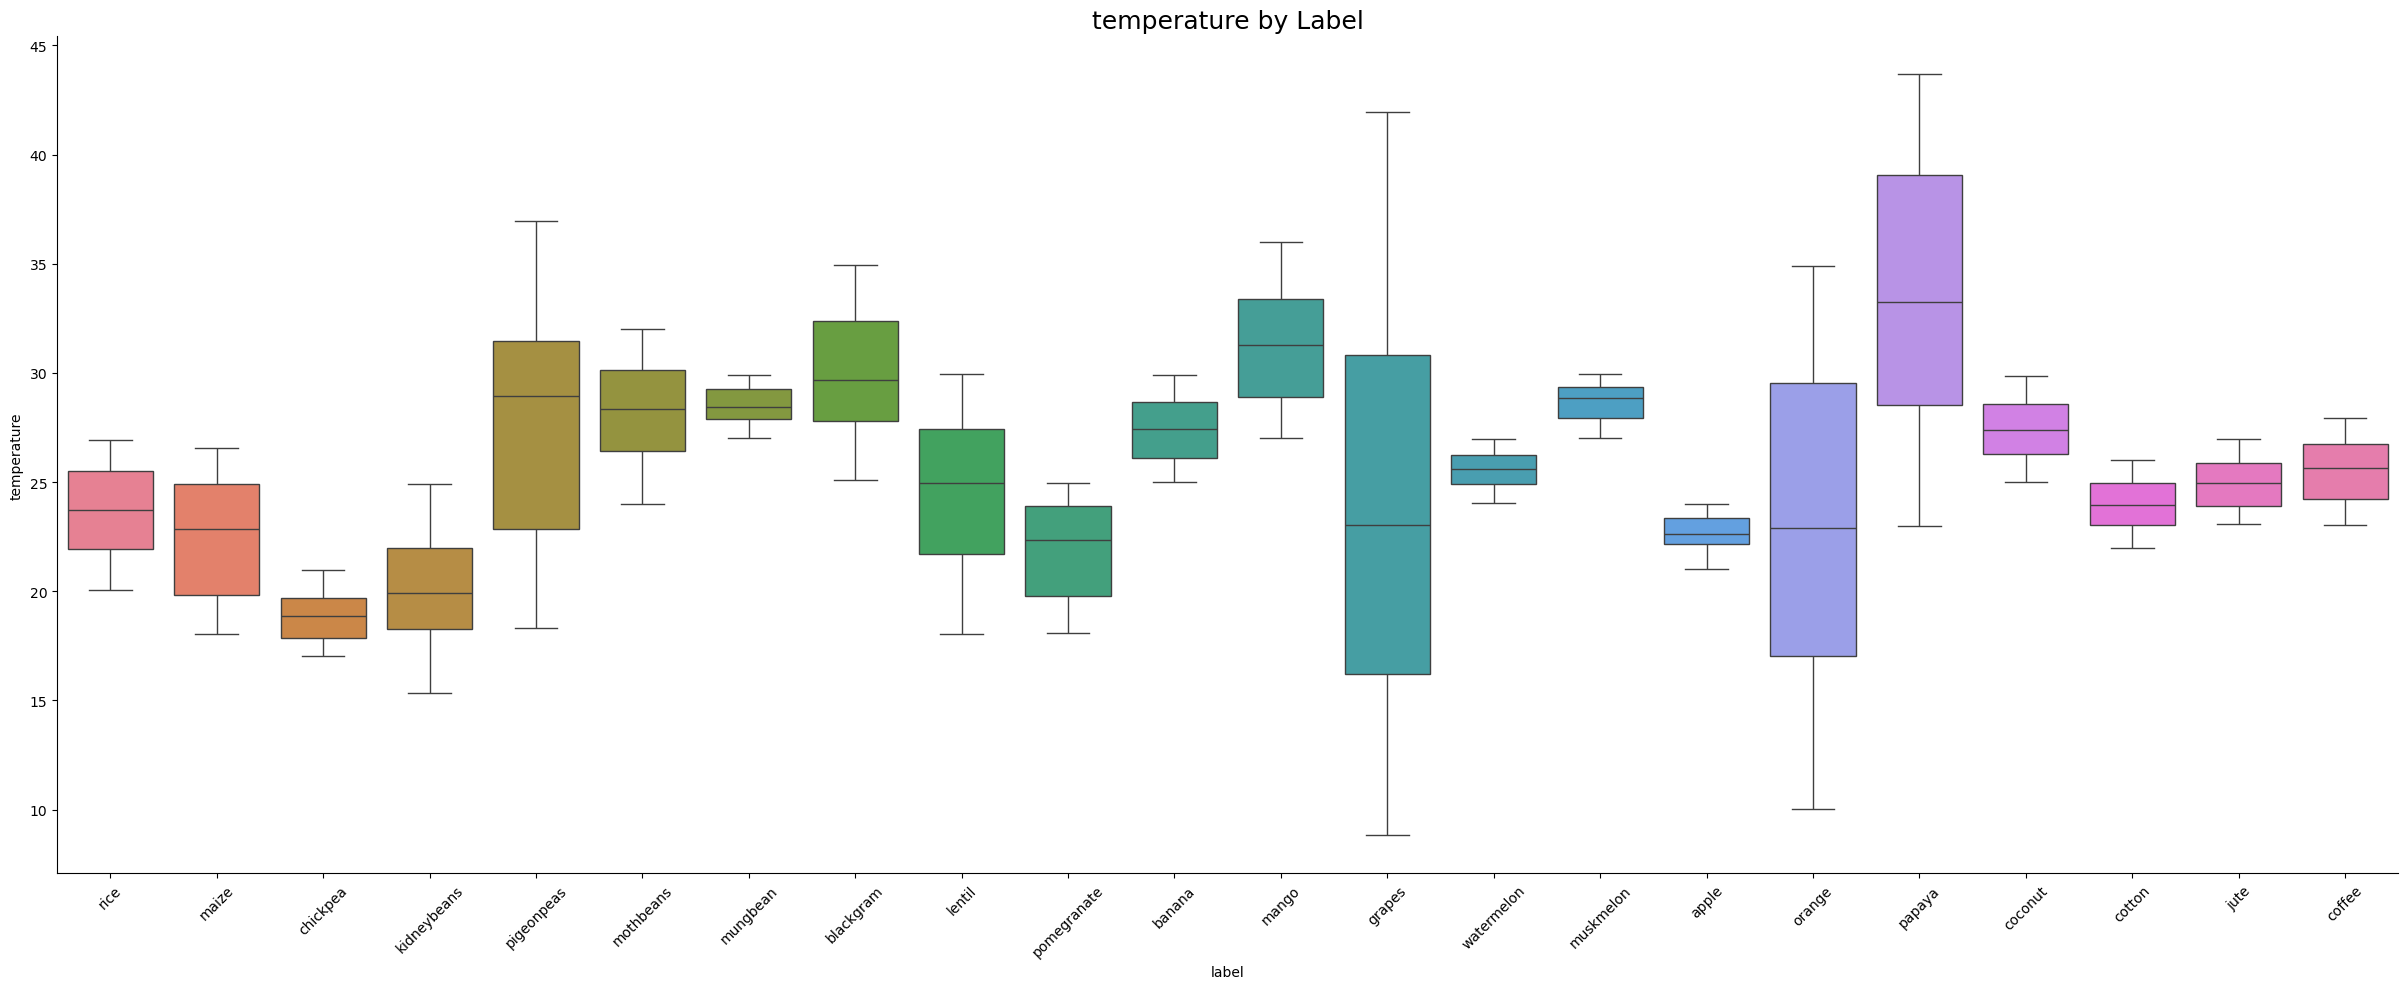

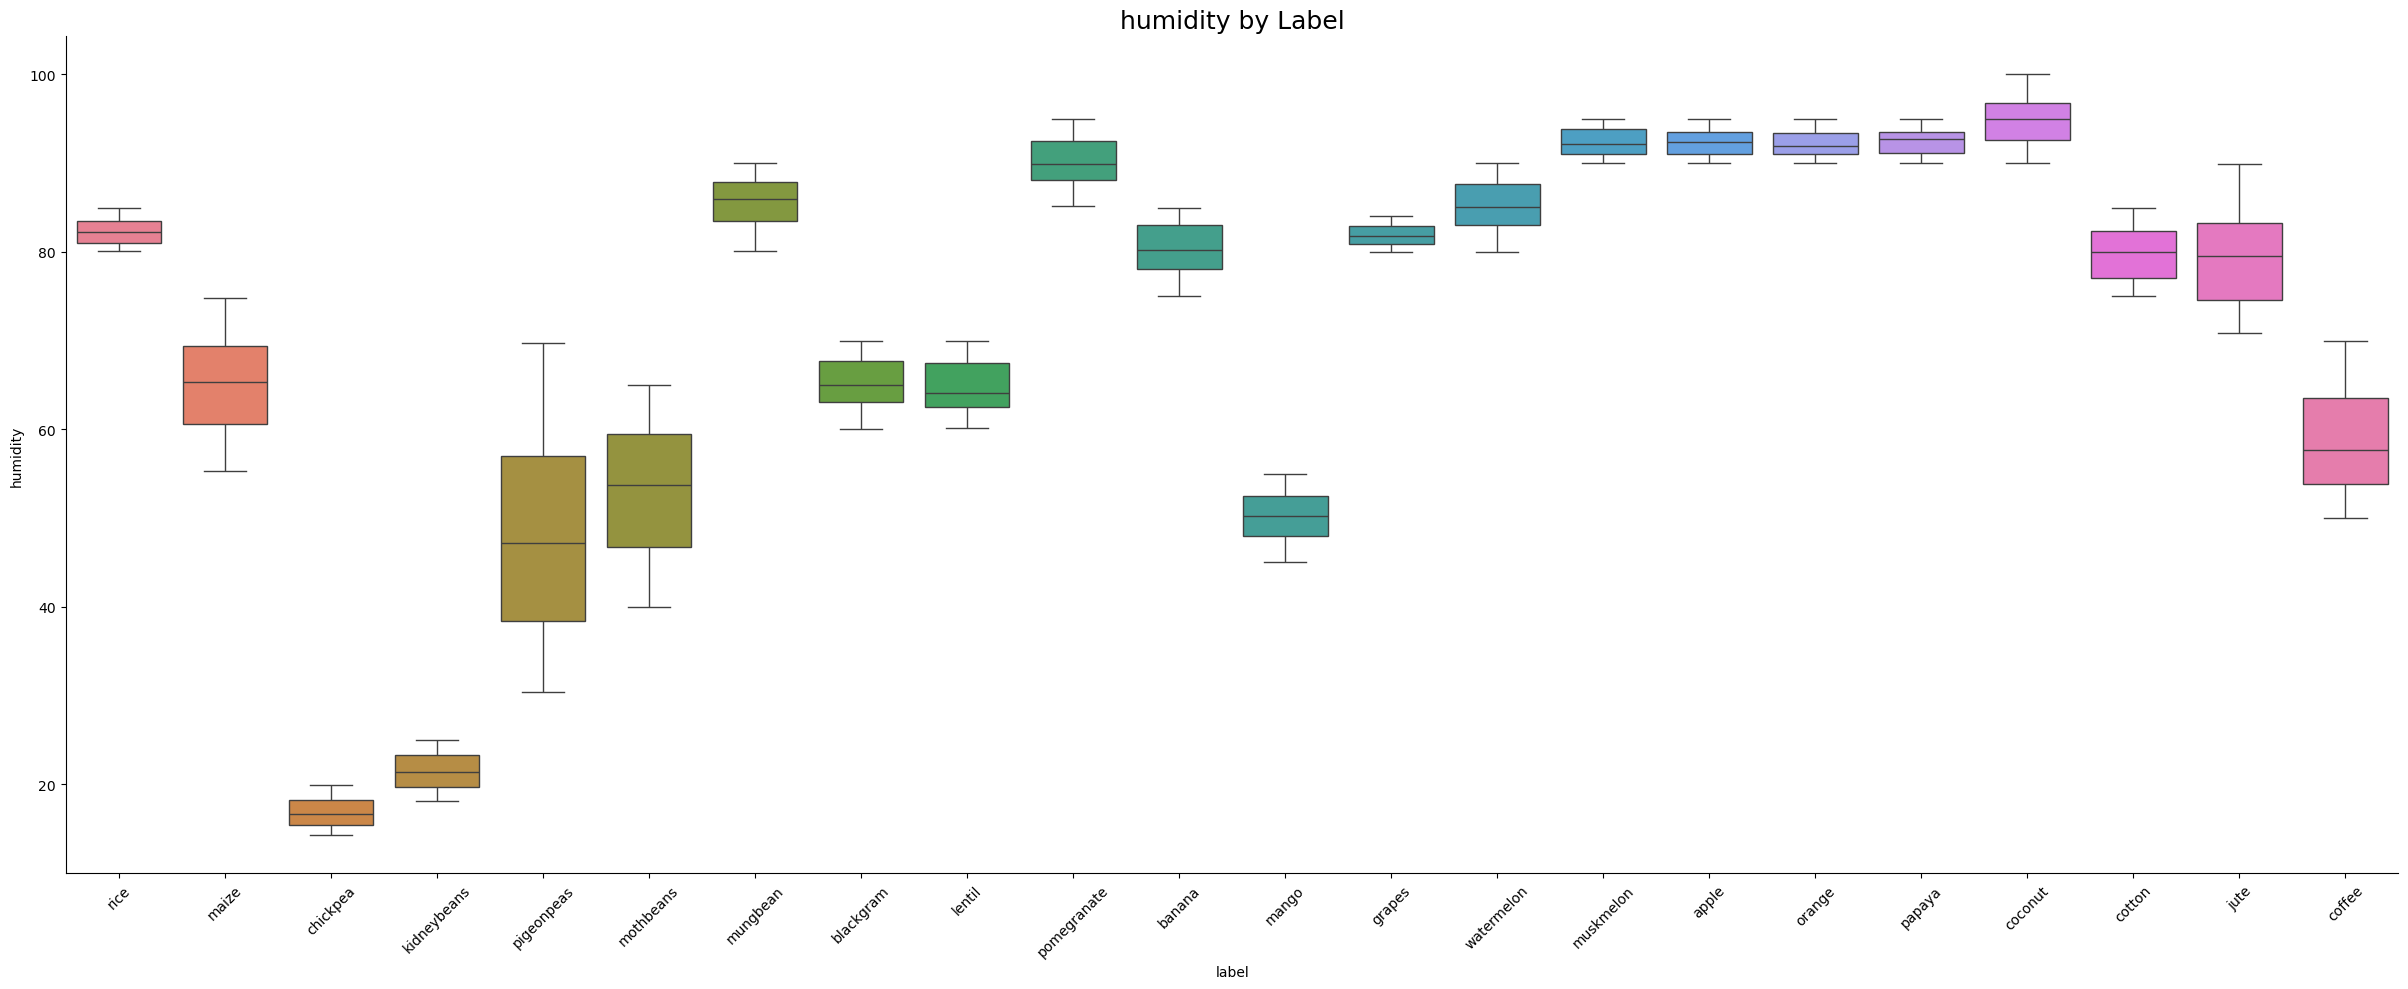

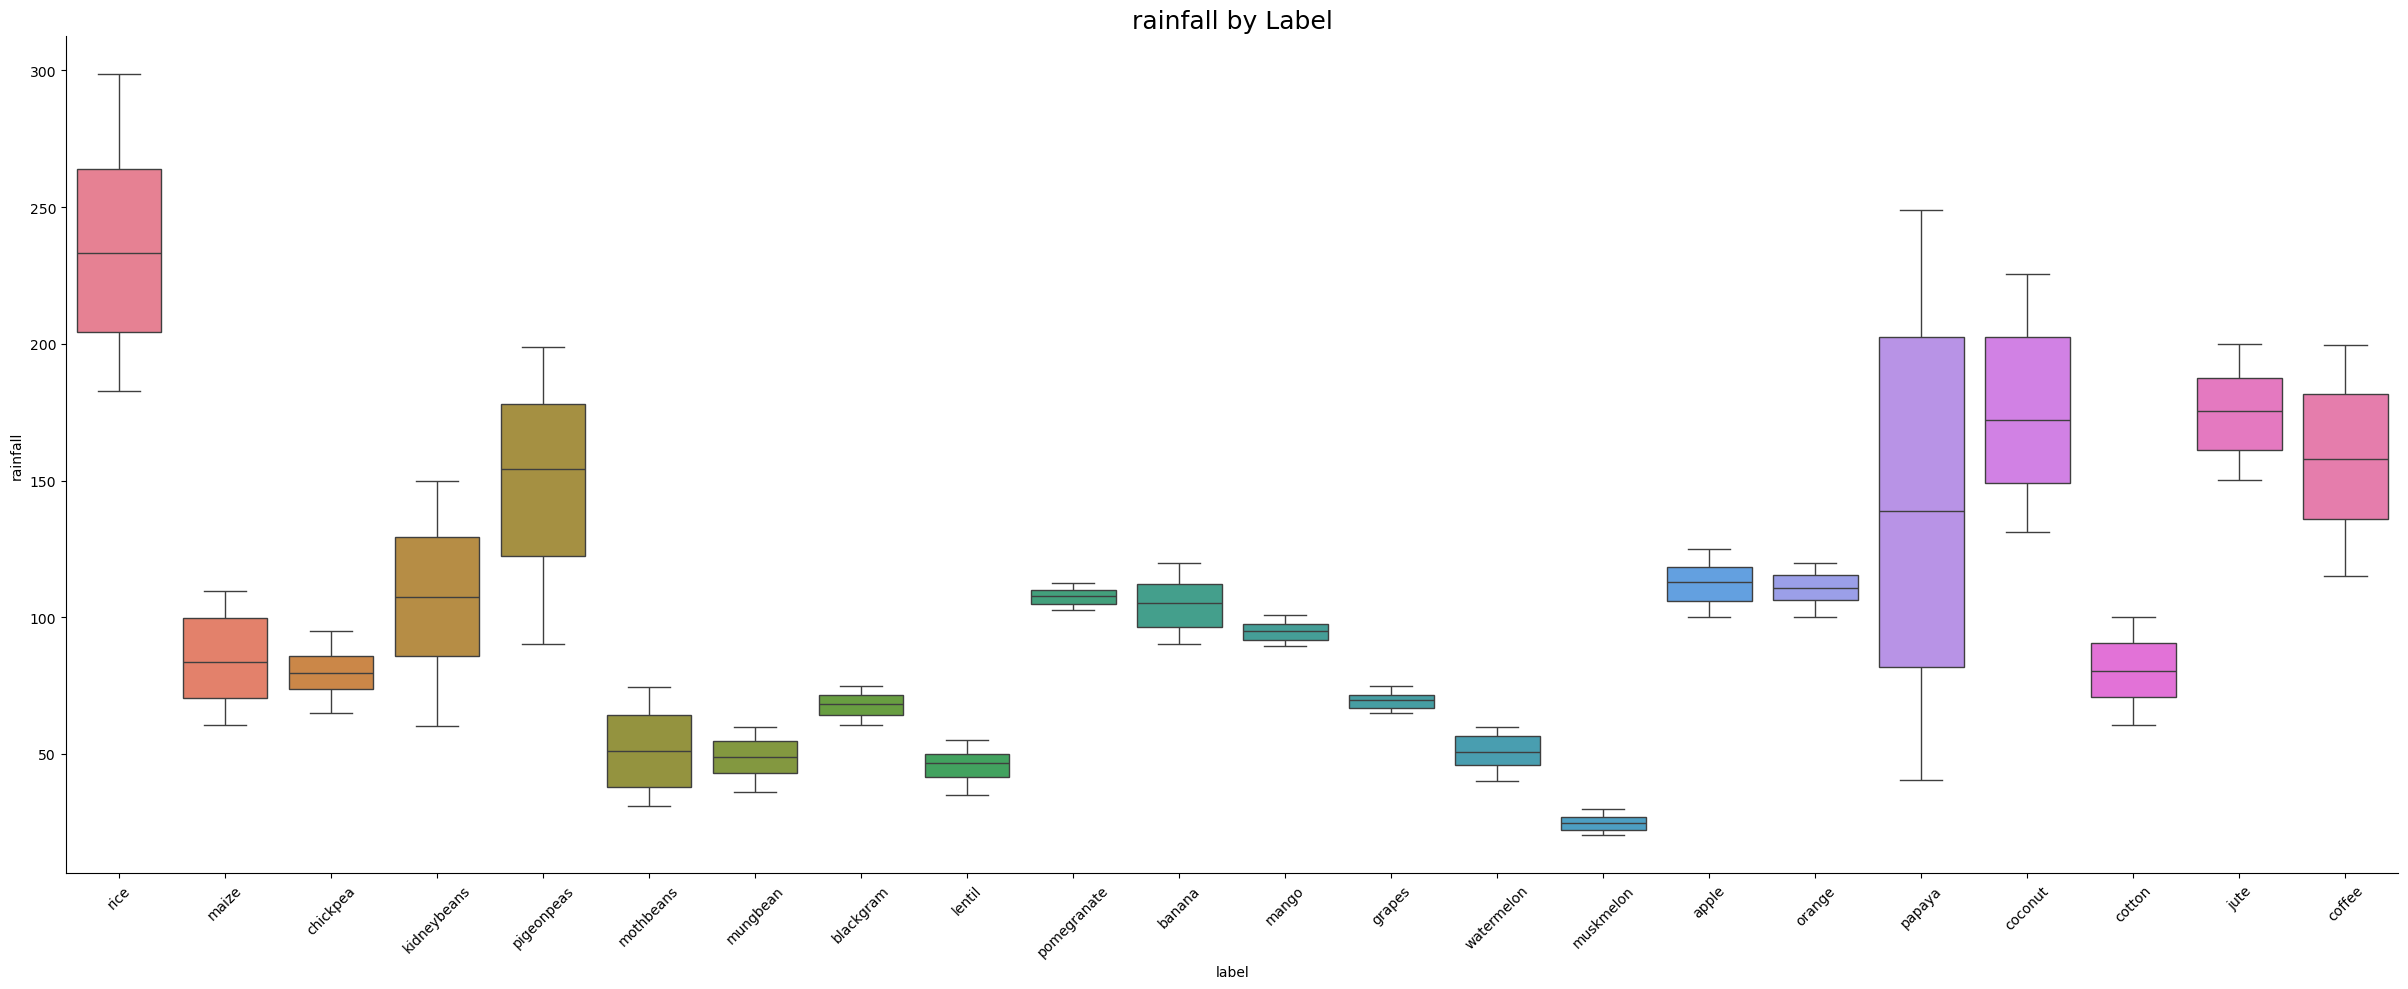

In [ ]:
# Plotting the boxplots for each label
columns_to_plot = ["PH", "nitrogen", "phosphorus", "potassium", "temperature", "humidity", "rainfall"]

for col in columns_to_plot:
    sns.catplot(data=df, x="label", y=col, kind="box", hue="label", height=10, aspect=20/8.27)
    plt.title(f"{col} by Label", size=18)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


The above shows the absence of outliers in the data

In [ ]:
X = df.drop(["label"], axis=1)
X.head()

,nitrogen,phosphorus,potassium,temperature,humidity,PH,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y = df["label"]
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y[:5]  

array([20, 20, 20, 20, 20])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Accuracy:  1.0
Test Accuracy:  0.9863636363636363
Predicted classes (first 10):  [15 21 17 17  0 12  0 13 14 10]
True classes (first 10):  [15 21 17 17  0 12  0 13 14 10]
Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92   

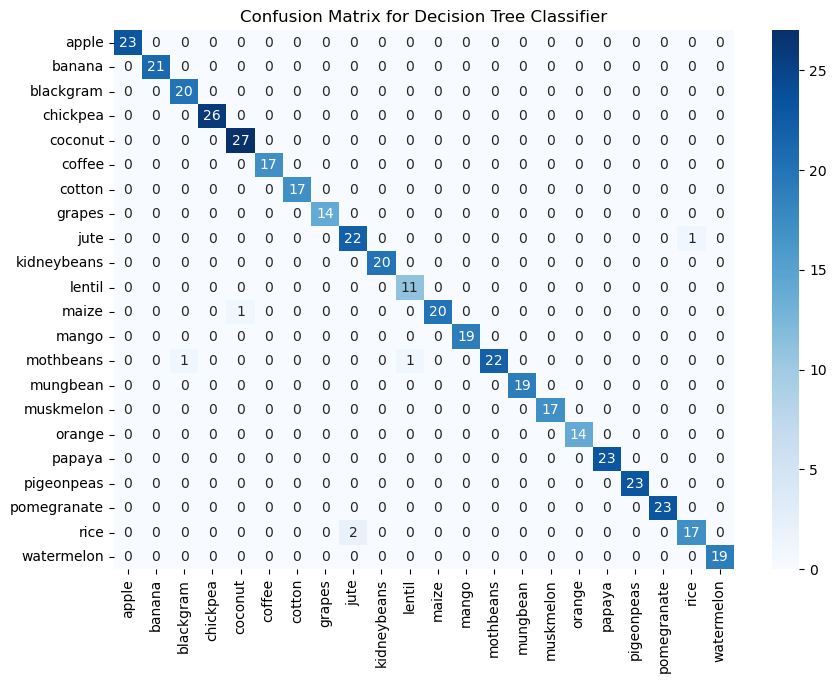

In [ ]:
# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dtree.fit(X_train_scaled, y_train)

# Predict on both training and test data
y_train_pred = dtree.predict(X_train_scaled)
y_test_pred = dtree.predict(X_test_scaled)

# Evaluate the model
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

# Checking the predictions and actual values
print("Predicted classes (first 10): ", y_test_pred[:10])
print("True classes (first 10): ", y_test[:10])

print("Test Classification Report: \n", classification_report(y_test, y_test_pred))

# Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(dtree, X_train_scaled, y_train, cv=kf)
print("Cross Validation Scores: ", cross_val_scores)
print("Mean Cross Validation Score: ", cross_val_scores.mean())


# Confusion matrix for the test data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()




Train Accuracy:  1.0
Test Accuracy:  0.9931818181818182
Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00      

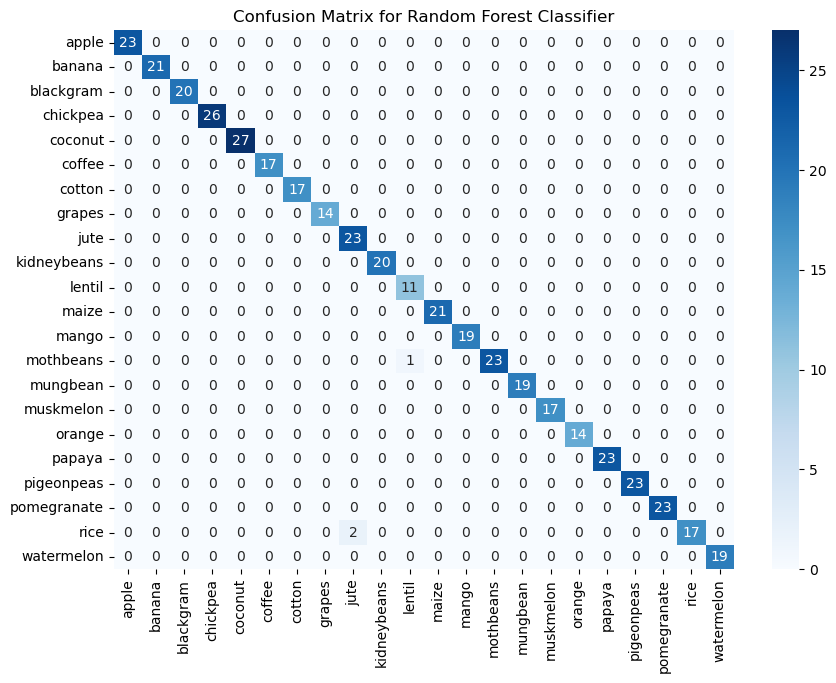

In [ ]:
rforest = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rforest.fit(X_train_scaled, y_train)

# Predict on both training and test data
y_train_pred = rforest.predict(X_train_scaled)
y_test_pred = rforest.predict(X_test_scaled)

# Evaluate the model
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Classification Report: \n", classification_report(y_test, y_test_pred))

# Checking the predictions and actual values
print("Predicted classes (20 to 40): ", y_test_pred[20:40])
print("True classes (20 to 40): ", y_test[20:40])

# Cross Validation to evaluate the model's performance
folds = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(rforest, X_train_scaled, y_train, cv=folds)
print("Cross Validation Scores: ", cross_val_scores)
print("Mean Cross Validation Score: ", cross_val_scores.mean())

# Confusion matrix for the test data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [ ]:
# Saving the rforest model
joblib.dump(rforest, "crop_recommendation_model.pkl")
joblib.dump(encoder, "LabelEncoder.pkl")
joblib.dump(scaler, "StandardScaler.pkl")

['StandardScaler.pkl']

## Utilizing a deep neural network.

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22)             │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,222 (47.74 KB)

 Trainable params: 12,222 (47.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.0277 - loss: 3.0656 - val_accuracy: 0.0966 - val_loss: 2.8960
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1013 - loss: 2.8282 - val_accuracy: 0.1676 - val_loss: 2.5254
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2245 - loss: 2.4021 - val_accuracy: 0.3920 - val_loss: 1.9565
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4019 - loss: 1.8520 - val_accuracy: 0.4858 - val_loss: 1.5293
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4859 - loss: 1.4834 - val_accuracy: 0.6108 - val_loss: 1.2184
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6342 - loss: 1.1303 - val_accuracy: 0.6534 - val_loss: 1.0223
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 0.9028 - val_accuracy: 0.7670 - val_loss: 0.7926
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7519 - loss: 0.8185 - val_accuracy: 0.8210 - val_lo

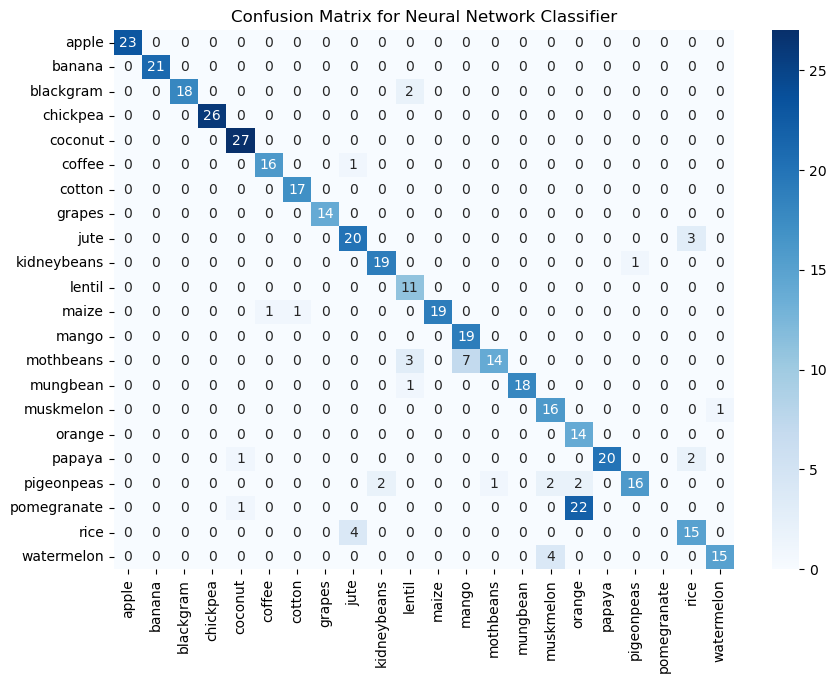

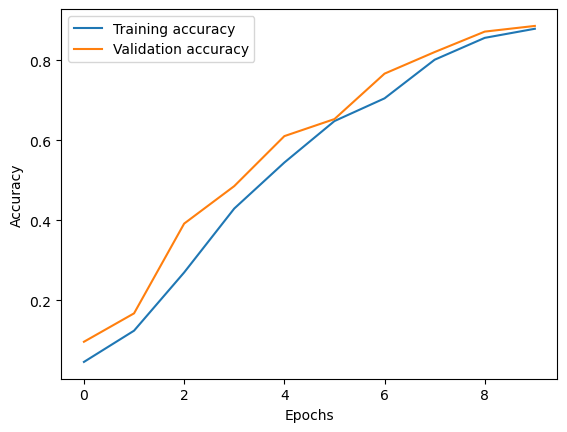

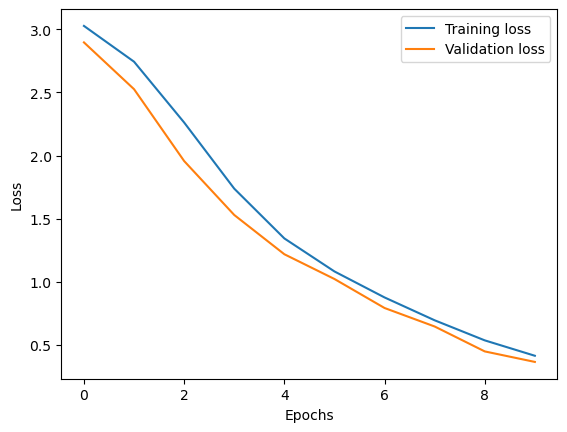

In [ ]:
model = Sequential()

# Adding layers to the training model
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Incoporating early stopping to prevent overfitting

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)


# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2,callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

# Predict on the test set
y_test_pred = model.predict(X_test_scaled)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print("Predicted Classes: ", y_test_pred_classes[10:20])
print("True Classes: ", y_test[10:20])



# Confusion matrix for the test data
cm = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix for Neural Network Classifier")
plt.show()

# Plotting the training and validation loss and accuracy

plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plotting training and validation loss valus
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The deep neural network also peforms well on achieving an accuracy of 94% in predicting the correct crop. It is also worth noting that accuracy increases as the number of epochs increases and has an inverse relationship with the loss

In [ ]:
# Saving the model
model.save("crop_recommendation_model.h5")
